<a href="https://colab.research.google.com/github/joethecoolest/Bai_Tap_AI/blob/main/Robot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score 

In [2]:
import csv
import math as m
l1 = 50
l2 = 40
with open('robot2.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','Px','Py'])

  for tt1 in range(-180,180,1):
    for tt2 in range(-180,180,1):
      tt1 = (tt1*m.pi)/180
      tt2 = (tt2*m.pi)/180
      Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2)
      Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2)
      writer.writerow([tt1,tt2,Px,Py])

In [3]:
data=pd.read_csv('robot2.csv')
data

,tt1,tt2,Px,Py
0,-3.141593e+00,-3.141593,-10.000000,3.673940e-15
1,-5.483114e-02,-3.124139,9.952796,-1.245418e+00
2,-9.569838e-04,-3.106686,10.023026,-1.405572e+00
3,-1.670252e-05,-3.089233,10.054784,-2.093606e+00
4,-2.915140e-07,-3.071779,10.097437,-2.790262e+00
...,...,...,...,...
129595,0.000000e+00,3.054326,10.152212,3.486230e+00
129596,0.000000e+00,3.071779,10.097438,2.790259e+00
129597,0.000000e+00,3.089233,10.054819,2.093438e+00
129598,0.000000e+00,3.106686,10.024367,1.395980e+00


In [4]:
x=data.drop(data.columns[:2],axis=1)

In [5]:
y=data.drop(data.columns[2:],axis=1)

In [6]:
x

,Px,Py
0,-10.000000,3.673940e-15
1,9.952796,-1.245418e+00
2,10.023026,-1.405572e+00
3,10.054784,-2.093606e+00
4,10.097437,-2.790262e+00
...,...,...
129595,10.152212,3.486230e+00
129596,10.097438,2.790259e+00
129597,10.054819,2.093438e+00
129598,10.024367,1.395980e+00


In [7]:
y

,tt1,tt2
0,-3.141593e+00,-3.141593
1,-5.483114e-02,-3.124139
2,-9.569838e-04,-3.106686
3,-1.670252e-05,-3.089233
4,-2.915140e-07,-3.071779
...,...,...
129595,0.000000e+00,3.054326
129596,0.000000e+00,3.071779
129597,0.000000e+00,3.089233
129598,0.000000e+00,3.106686


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [9]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout 
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(2,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1536      
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 2)                 102       
                                                                 
Total params: 57,988
Trainable params: 57,988
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128,epochs=500,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)],validation_data = (x_test, y_test))

Epoch 1/500
760/760 [==============================] - 6s 6ms/step - loss: 1.3734 - accuracy: 0.9853 - val_loss: 1.3749 - val_accuracy: 0.9942
Epoch 2/500
760/760 [==============================] - 5s 7ms/step - loss: 1.3712 - accuracy: 0.9895 - val_loss: 1.3755 - val_accuracy: 0.9859
Epoch 3/500
760/760 [==============================] - 6s 8ms/step - loss: 1.3703 - accuracy: 0.9902 - val_loss: 1.3750 - val_accuracy: 0.9887
Epoch 4/500
760/760 [==============================] - 5s 7ms/step - loss: 1.3701 - accuracy: 0.9905 - val_loss: 1.3748 - val_accuracy: 0.9917
Epoch 5/500
760/760 [==============================] - 5s 7ms/step - loss: 1.3705 - accuracy: 0.9909 - val_loss: 1.3747 - val_accuracy: 0.9995
Epoch 6/500
760/760 [==============================] - 5s 7ms/step - loss: 1.3709 - accuracy: 0.9906 - val_loss: 1.3755 - val_accuracy: 0.9857
Epoch 7/500
760/760 [==============================] - 3s 4ms/step - loss: 1.3710 - accuracy: 0.9863 - val_loss: 1.3749 - val_accuracy: 0.9969

Sai số:  1.3742640018463135
Độ chính xác:  0.999691367149353


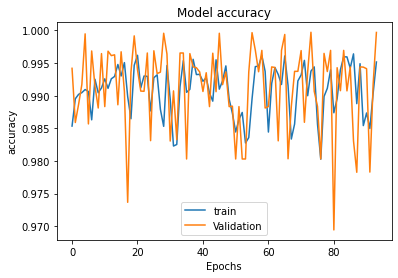

In [11]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epochs')
plt.legend(['train','Validation'])
plt.show()

In [12]:
model.save('robot2.hs')

INFO:tensorflow:Assets written to: robot2.hs/assets
